In [21]:
import icf
xdata, ydata = icf.load_2col("Earliest_image_ROI.csv")

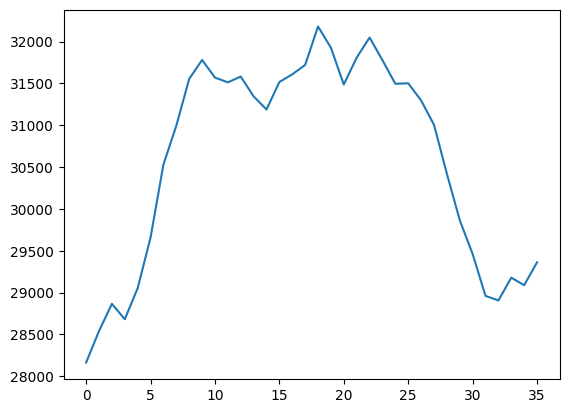

In [22]:
#reader
import icf
import matplotlib.pyplot as plt


xdata, ydata = icf.load_2col("Earliest_image_ROI.csv")

plt.plot(xdata, ydata)
plt.show()


In [23]:
#stattest
import statistics as s

data = [1,3,4,5]



In [24]:
#plot-data
import icf
import matplotlib.pyplot as plt


# Load in the data from Google Sheets
# Note this load_4col function specifically assumes 
# the data has non-numeric data in column 1, and 
# numeric data in columns 2,3 and 4
stamp, xdata, ydata, yerr = icf.load_4col("Earliest_image_ROI.csv")

# Plot a figure with error bars
plt.figure()
plt.errorbar(xdata, ydata,yerr=yerr, fmt='--o', capsize=4)
plt.xlabel("Time / ns")
plt.ylabel("Capsule Radius / um")
plt.show()

IndexError: list index out of range

Our initial guess is [1, 1, 1]
Parameter 0 : 2.918342721801336 +/- 0.04830958900575056
Parameter 1 : 2.004593812415397 +/- 0.0038170428630017596
Parameter 2 : -0.19969236292510784 +/- 0.0038170428807344815
Fit parameters :  [ 2.91834272  2.00459381 -0.19969236]
Fit standard deviations :  [0.04830959 0.00381704 0.00381704]
R^2 =  0.9793461793079167


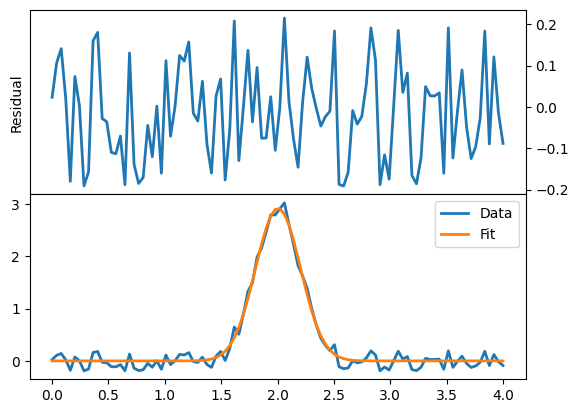

In [20]:
#fitting
import numpy as np
from scipy.optimize import curve_fit
import icf


# This function will generate a perfect Gaussian 
# You can replace this function with any other you want to fit with...
def gaussian(x, *params):

	A = params[0]
	x0 = params[1]
	c = params[2]
	
	return A*np.exp(-(x-x0)**2/(2*c*c))

	
	
#
# This section will make a numpy array containing a gaussian 
#

# This makes a numpy array with 100 equally spaced points between 0 and 4
xdata = np.linspace(0,4,100)

# This makes a gaussian using these x points
ydata = gaussian(xdata, 3, 2, 0.2)

# Lets add some noise
for i in range(len(ydata)):
	ydata[i] +=  0.4*(np.random.random_sample()-0.5)


#
# This section will do a fit
#

# This does the fit, and returns the fit parameters and the covariances

guess = [1,1,1]
print("Our initial guess is", guess)
popt, pcov = curve_fit(gaussian, xdata, ydata, p0=guess)



for i in range(len(popt)):
	print ("Parameter",i,":",popt[i],"+/-",np.sqrt(pcov[i][i]))
	
print("Fit parameters : ", popt)
print("Fit standard deviations : ", np.sqrt(np.diag(pcov)))


# This generates a new list with a Gaussian using the identified fit parameters
# This data is therefore the best fit curve 
yfit = gaussian(xdata, *popt)

print("R^2 = ", icf.r_squared(ydata, yfit))

# This will plot the output, both the original data and the best fit, as well as a residual
# Note this is a special plotting routine written for the icf labs, hence the 'icf' prefix
# The source code can be found in icf.py if you want to copy/alter it
 
icf.fit_plot(xdata, ydata, yfit)


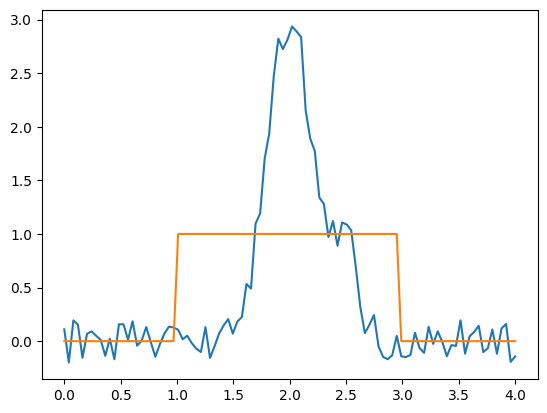

Our initial guess is [1, 1, 1]
Parameter 0 : 2.780054923443792 +/- 0.06692649557355583
Parameter 1 : 2.0279804010622753 +/- 0.00683146477524434
Parameter 2 : -0.2457502695392086 +/- 0.006831464761514278
Fit parameters :  [ 2.78005492  2.0279804  -0.24575027]
Fit standard deviations :  [0.0669265  0.00683146 0.00683146]
R^2 =  0.9438821006147071


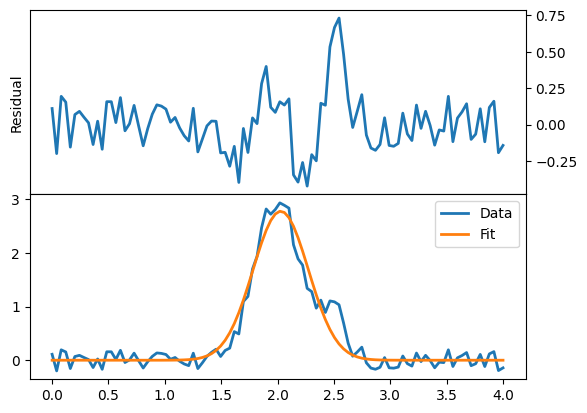

In [28]:
#masking
import numpy as np
from scipy.optimize import curve_fit
import icf
import matplotlib.pyplot as plt


# This function will generate a perfect Gaussian 
# You can replace this function with any other you want to fit with...
def gaussian(x, *params):

	A = params[0]
	x0 = params[1]
	c = params[2]
	
	return A*np.exp(-(x-x0)**2/(2*c*c))

	
	
#
# This section will make a numpy array containing a gaussian 
#

# This makes a numpy array with 100 equally spaced points between 0 and 4
xdata = np.linspace(0,4,100)

# This makes the main gaussian peak using these x points
ydata = gaussian(xdata, 3, 2.0, 0.2)

# This adds a second sattelite Gaussian (which we will aim to ignore during the fit)
ydata += gaussian(xdata, 1.0, 2.5, 0.1)

# Lets add some noise
for i in range(len(ydata)):
        ydata[i] +=  0.4*(np.random.random_sample()-0.5)

# We now define a mask

mask = np.zeros_like(xdata)

maskMin = icf.find_closest(xdata, 1)
maskMax = icf.find_closest(xdata, 3)

# You can comment this line out to set the entire mask to 1
# This will fit to the whole data set - compare the results 
# with or without the mask to the initial values for the
# main peak given above 
mask[maskMin:maskMax]=1.0

plt.plot(xdata, ydata)
plt.plot(xdata, mask)
plt.show()

#
# This section will do a fit
#

# This does the fit, and returns the fit parameters and the covariances

guess = [1,1,1]
print("Our initial guess is", guess)
popt, pcov = curve_fit(gaussian, xdata, mask*ydata, p0=guess)



for i in range(len(popt)):
	print ("Parameter",i,":",popt[i],"+/-",np.sqrt(pcov[i][i]))
	
print("Fit parameters : ", popt)
print("Fit standard deviations : ", np.sqrt(np.diag(pcov)))


# This generates a new list with a Gaussian using the identified fit parameters
# This data is therefore the best fit curve 
yfit = gaussian(xdata, *popt)

print("R^2 = ", icf.r_squared(ydata, yfit))

# This will plot the output, both the original data and the best fit, as well as a residual
# Note this is a special plotting routine written for the icf labs, hence the 'icf' prefix
# The source code can be found in icf.py if you want to copy/alter it
 
icf.fit_plot(xdata, ydata, yfit)
